# Linear Regression
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In a simple regression problem (a single x and a single y), the form of the model would be:  
$\hat{y} = \beta_0 + \beta_1.X$

For multiple features, the equation becomes:  
$\hat{y} = \beta_0 + \beta_1.X_1 + \beta_2.X_2 + ... + \beta_n.X_n = \Sigma B_i.X_i$

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Exploratory Data Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

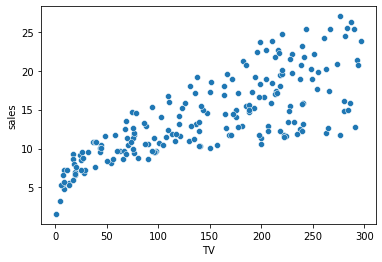

In [6]:
sns.scatterplot(x='TV', y='sales', data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

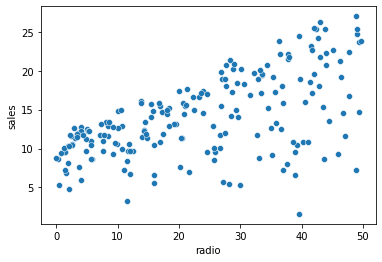

In [7]:
sns.scatterplot(x='radio', y='sales', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

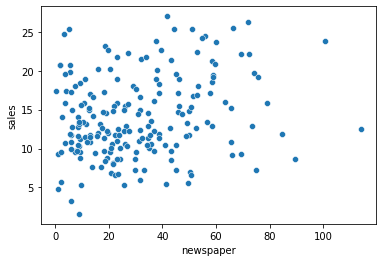

In [8]:
sns.scatterplot(x='newspaper', y='sales', data=df)

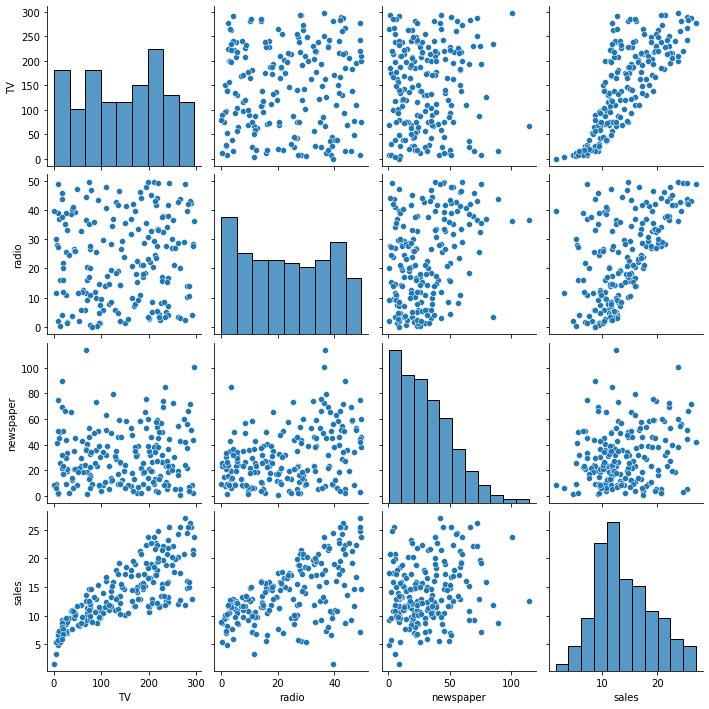

In [9]:
sns.pairplot(df)

### Feature Selection

In [10]:
X = df.drop('sales', axis=1) # Independent Features (Columns used for prediction)
y = df['sales'] # Dependent Feature (Column that is to be predicted)

In [11]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Train Test Split
In supervised machine learning, we split our datasets into training and testing sets. The training set is used to train the machine learning algorithm by providing X_train, y_train values to the algorithm. We provide the X_test values to the model and the model gives us predictions in y_pred. Then we compare y_pred and y_test to calculate the performance of our model.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [15]:
X_train.head()

,TV,radio,newspaper
105,137.9,46.4,59.0
168,215.4,23.6,57.6
173,168.4,7.1,12.8
145,140.3,1.9,9.0
129,59.6,12.0,43.1


In [16]:
len(X)

200

In [17]:
len(X_train)

140

In [18]:
len(y_train)

140

### Linear Regression Model

General Equation: $\hat{y} = \beta_0 + \beta_1.X_1 + \beta_2.X_2 + ... + \beta_n.X_n = \Sigma B_i.X_i$

$X_i$: Input  
$\hat{y}$: Predicted Output  
$\beta_0$: Intercept (bias)  
$\beta_i$: Coefficients  

In our case,  $\hat{y} = \beta_0 + \beta_1.X_1 + \beta_2.X_2 + \beta_3.X_3$
$(X_1: TV, X_2: radio, X_3: newspaper, \hat{y}: Predicted Sales)$  
So the goal of the linear regression model is to accurately calculate the values of $\beta_0, \beta_1, \beta_2 and \beta_3$.

Error = $y - \hat{y}$ (for each and every row)  
Average Squard Error = $(\Sigma(y - \hat{y})^2) / n$ (y: Actual Sales, n: no. of samples)  
The goal is to minimize the average squared error.

Cost Function = $(\Sigma(y - \Sigma\beta_i.X_i)^2) / n$

To minimize the function, we can set the derivative to zero. For the calculation, we use gradient descent which is an optimization algorithm. Essentially we are optimizing the values of beta.

#### Ordinary Least Squares
The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This
means that given a regression line through the data we calculate the distance from each data point
to the regression line, square it, and sum all of the squared errors together. This is the quantity that
ordinary least squares seeks to minimize.
![OLS](https://miro.medium.com/max/500/0*gglavDlTUWKn4Loe)

#### Gradient Descent
When there are one or more inputs, we use a process of optimizing the values of the coefficients by
iteratively minimizing the error of the model on your training data. This operation is called Gradient
Descent and works by starting with random values for each coefficient. The sum of the squared
errors are calculated for each pair of input and output values. The coefficients are updated in the
direction towards minimizing the error. The process is repeated until a minimum sum squared error
is achieved.
![GD](https://www.oreilly.com/library/view/learn-arcore/9781788830409/assets/f3899ca3-835e-4d3e-8e7f-fd1c5a9044fb.png)

#### Create Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_test[:5] # Actual values in dataframe

122    11.6
24      9.7
23     15.5
148    10.9
76      6.9
Name: sales, dtype: float64

In [24]:
y_pred[:5] # Values predicted by our machine learning model

array([13.64881754,  8.55025122, 16.51544855, 12.84662834,  4.91417779])

### Performance Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

${\large y: y\_test}$  
${\large \hat{y}: y\_pred}$  

$MAE: {\Large \frac{\Sigma |y - \hat{y}|}{n}}$  
$MSE: {\Large \frac{\Sigma (y - \hat{y})^2}{n}}$ (punishes large errors)  
$RMSE: {\Large \sqrt{\frac{\Sigma (y - \hat{y})^2}{n}}}$ (punishes large errors but also has same unit as error)

In [26]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE: 1.537705716801535
MSE: 4.759215713246758
RMSE: 2.18156267690084


In [27]:
model.intercept_ # B0
# B0 is the amount of predicted sales when no advertisement is done (intercept or bias)

3.594279609869089

In [28]:
model.coef_ # B1, B2, B3
# For 1 unit increase in TV advertisement, sales will increase by 0.043446 (B1) units
# For 1 unit increase in radio advertisement, sales will increase by 0.19119927 (B2) units
# For 1 unit increase in newspaper advertisement, sales will decrease by 0.00873361 (B1) units
# The newspaper coefficient is so low that it can be ignored
# It means that newspaper advertisement has no effect on Sales
# Hence the company should stop advertisement in newspaper

array([ 0.043446  ,  0.19119927, -0.00873361])

In [29]:
error = y_test - y_pred

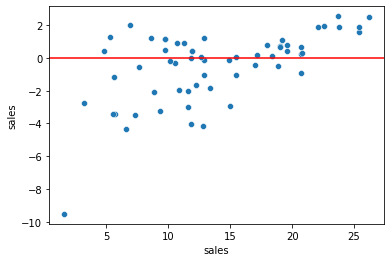

In [31]:
sns.scatterplot(x=y_test, y=error)
plt.axhline(y=0, color='red')
# There should not be any noticable pattern in this graph (line, curve, etc.)

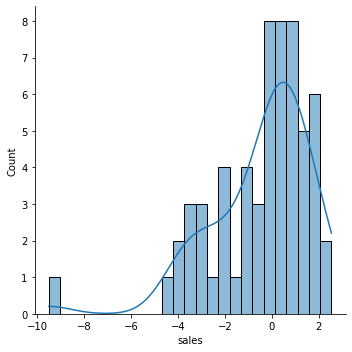

In [32]:
sns.displot(error, bins=25, kde=True)
# This data should be normally distributed